In [1]:
%matplotlib inline

In [2]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

In [3]:
RAW_HASHED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/hashed_exec_lights")
RAW_ATTENUATED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/forward_deferred")
RAW_TILED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/tiled_exec_lights")

ANALYSIS_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/analysis/hashed_exec")

In [4]:
N_TESTS = 3
RESOLUTION = 2560

SCENES = {"pipers-alley" : { "58#1x_1y_1z" :[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.033,
                                                  3.155555555555,
                                                ],
                                 "116#2x_1y_1z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.033,
                                                  3.251,
                                 ],
                                 "174#1x_3y_1z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.071,
                                                  3.31111,
                                 ],
                                 "232#1x_2y_2z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  1.999,
                                                  3.31111,
                                 ],
                                 "348#1x_2y_3z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.033,
                                                  3.155555555555,
                                 ],
                                 "464#2x_2y_2z":[ 0.2507,
                                                  0.507,
                                                  0.997,
                                                  2.033,
                                                  3.31111,
                                 ],
                                 "522#1x_3y_3z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.033,
                                                  3.31111,
                                 ],
                                 "696#3x_2y_2z":[ 0.2507,
                                                  0.507,
                                                  1.066666,
                                                  2.033,
                                                  3.31111,
                                 ],
                                 "1044#3x_3y_2z":[ 0.2507,
                                                   0.507,
                                                   1.066666,
                                                   2.033,
                                                   3.31111,
                                 ],
                               },
              "ziggurat-city" : { "65#1x_1y_1z" : [0.2499,
                                                   0.507,
                                                   1.07,
                                                   2.07,
                                                   2.999,
              ],
                                  "130#2x_1y_1z":[0.247,
                                                  0.497,
                                                  1.07,
                                                  2.07,
                                                  2.999,
                                  ],
                                  "195#1x_1y_3z":[ 0.247,
                                                   0.507,
                                                   1.07,
                                                   2.03,
                                                   2.979,
                                  ],
                                  "260#2x_2y_1z":[ 0.2499,
                                                   0.4851,
                                                   1.07,
                                                   2.03,
                                                   2.9,
                                  ],
                                  "390#3x_1y_2z":[ 0.247,
                                                   0.497,
                                                   1.07,
                                                   2.03,
                                                   3.88333,
                                  ],
                                  "520#2x_2y_2z":[ 0.247,
                                                   0.507,
                                                   1.07,
                                                   2.03,
                                                   3.58333,
                                  ],
                                  "585#3x_3y_1z":[ 0.2499,
                                                   0.507,
                                                   1.07,
                                                   2.03,
                                                   2.99577
                                  ],
                                  "780#3x_2y_2z":[ 0.2499,
                                                   0.507,
                                                   1.07,
                                                   2.03,
                                                   3.01577
                                  ],
                                  "1170#3x_3y_2z":[ 0.2499,
                                                    0.507,
                                                    1.07,
                                                    2.03,
                                                    3.18333,
                                  ],
              },
              "spaceship-indoor" : { "70#1x_1y_1z" : [ 0.2507,
                                       0.507,
                                       1.13,
                                       2.13,
                                       3.05,
                                     ],
                     "140#2x_1y_1z" : [ 0.24013,
                                       0.507,
                                       1.13,
                                       2.13,
                                       3.013,
                                     ],
                     "210#3x_1y_1z" :[ 0.24013,
                                       0.507,
                                       1.13,
                                       2.13,
                                       3.107,
                                     ],
                     "280#2x_2y_1z":[ 0.2507,
                                       0.507,
                                       1.13,
                                       2.13,
                                       3.013,
                                     ],
                     "420#3x_2y_1z":[ 0.2507,
                                      0.507,
                                      1.13,
                                      2.13,
                                      3.107,
                                     ],
                     "560#2x_2y_2z":[ 0.2333,
                                      0.507,
                                      1.13,
                                      2.13,
                                      3.013,
                                     ],
                     "630#3x_3y_1z":[ 0.25333333,
                                      0.507,
                                      1.13,
                                      2.13,
                                      3.107,
                                     ],
                     "840#3x_2y_2z":[ 0.2333,
                                      0.507,
                                      1.13,
                                      2.13,
                                      3.013,
                                     ],
                     "1260#3x_3y_2z":[0.24013,
                                      0.507,
                                      1.13,
                                      2.13,
                                      3.107,
                                     ],
              }
    }


In [5]:
def json_to_dataframe(json_dic : dict) -> pd.DataFrame:
    '''
    Convert a json data file spit out by nTiled into something just slightly more useful
    '''
    # get all functions tracked from first frame
    frames = json_dic["frames"]
    functions = list(x for x in frames[0]["functions"])
    
    # build empty dictionary which will be loaded with data from frames
    data_raw = { fn : {} for fn in functions }    
    frames_i = {}
    
    for f in frames:
        f_i = int(f["frame"])
        frames_i[f_i] = f_i
        for fn in functions:
            if fn in f["functions"]:
                data_raw[fn][f_i] = float(f["functions"][fn])
            
    data_series = {fn : pd.Series(data_raw[fn], name=fn) for fn in functions }
    data_series["index"] = pd.Series(frames_i, name="index")
    
    dataframe = pd.DataFrame(data_series)
    return dataframe

In [9]:
path = RAW_HASHED_DATA_ROOT / Path("deferred/pipers-alley/1044#3x_3y_2z/0.507/data_0.json")

with open(str(path), 'r') as f:
    data_json = json.loads(f.read())
df = json_to_dataframe(data_json)

df

,DeferredHashedShader::renderGeometryPassObjects,DeferredHashedShader::renderLightPassObjects,index
3,16.829998,0.104691,3
4,59.233487,0.114568,4
5,59.110623,0.111802,5
6,56.942922,0.116543,6
7,54.445741,0.099950,7
8,54.337889,0.116543,8
9,53.785989,0.069926,9
10,52.210880,0.112592,10
11,52.329004,0.070321,11
12,52.646633,0.112987,12


In [13]:
[df.mean(axis=0).iloc[0], 1044]

[84.915228884071865, 1044]

In [12]:
col_list = list(x for x in df if (x != 'index'))
df_val = df[col_list].sum(axis=1).mean()
df_val

85.016461129254537

In [14]:
def extract_lights_data_frame_hashed(scene, node_size, pipeline_type):
    folder_path = RAW_HASHED_DATA_ROOT / Path("{}/{}/".format(pipeline_type, scene))
    
    output = pd.DataFrame([], columns=["execution_time", "n_lights"])
    
    index = 0
    
    for ld in SCENES[scene]:
        ld_path = folder_path / Path("{}/{}".format(ld, SCENES[scene][ld][node_size]))
        n_lights = int(ld.split("#")[0])
        
        for i in range(N_TESTS):
            file_path = ld_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            
            col_list = list(x for x in df if (x != 'index'))
            df_val = df[col_list].sum(axis=1).mean()

            output.loc[index] = [df_val, n_lights]
            index += 1
    return output

In [15]:
def extract_lights_data_frame_attenuated(scene, pipeline_type):
    folder_path = RAW_ATTENUATED_DATA_ROOT / Path("{}/{}/".format(pipeline_type, scene))
    
    output = pd.DataFrame([], columns=["execution_time", "n_lights"])
    
    index = 0
    
    for ld in SCENES[scene]:
        ld_path = folder_path / Path("{}/{}/".format(ld, RESOLUTION))
        n_lights = int(ld.split("#")[0])
        
        for i in range(N_TESTS):
            file_path = ld_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            col_list = list(x for x in df if (x != 'index'))
            df_val = df[col_list].sum(axis=1).mean()

            output.loc[index] = [df_val, n_lights]
            index += 1
    return output

In [16]:
def extract_lights_data_frame_tiled(scene, pipeline_type):
    folder_path = RAW_TILED_DATA_ROOT / Path("{}/{}/".format(pipeline_type, scene))
    
    output = pd.DataFrame([], columns=["execution_time", "n_lights"])
    
    index = 0
    
    for ld in SCENES[scene]:
        ld_path = folder_path / Path("{}/".format(ld))
        n_lights = int(ld.split("#")[0])
        
        for i in range(N_TESTS):
            file_path = ld_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            col_list = list(x for x in df if (x != 'index'))
            df_val = df[col_list].sum(axis=1).mean()

            output.loc[index] = [df_val, n_lights]
            index += 1
    return output

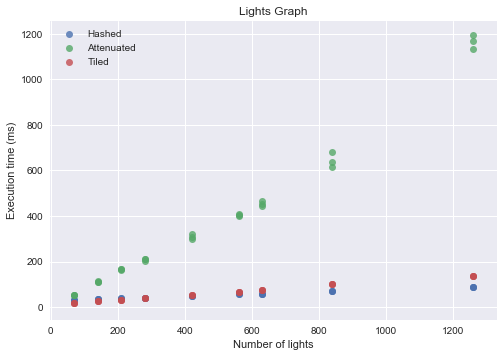

In [17]:
si_lights_hashed = extract_lights_data_frame_hashed("spaceship-indoor", 0, "forward")
si_lights_attenuated = extract_lights_data_frame_attenuated("spaceship-indoor", "forward")
si_lights_tiled = extract_lights_data_frame_tiled("spaceship-indoor", "forward")

ax = sns.regplot("n_lights", "execution_time", 
                 data=si_lights_hashed, fit_reg=False, 
                 label="Hashed")
ax = sns.regplot("n_lights", "execution_time", 
                 data=si_lights_attenuated, fit_reg=False, 
                 label="Attenuated")
ax = sns.regplot("n_lights", "execution_time", 
                 data=si_lights_tiled, fit_reg=False, 
                 label="Tiled")

    
ax.set(xlabel='Number of lights', ylabel='Execution time (ms)')
ax.legend()         
ax.set_title("Lights Graph")
    
plt.show()

In [26]:
def plot_lights_plot(scene: str, pipeline_type: str):
    lights_attenuated = extract_lights_data_frame_attenuated(scene, pipeline_type)
    lights_tiled = extract_lights_data_frame_tiled(scene, pipeline_type)
    
    lights_hashed = list(extract_lights_data_frame_hashed(scene, i, pipeline_type) for i in range(5))

    # Plot resolution
    # -----------------------------------------------------------------------------------
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    sns.regplot("n_lights", "execution_time", 
                data=lights_attenuated, #fit_reg=False,
                ax=ax,
                label="Naief",
                x_estimator=np.mean,
                order=1,
                ci=100)
    sns.regplot("n_lights", "execution_time", 
                data=lights_tiled, #fit_reg=False,
                ax=ax,
                label="Tiled - 32",
                x_estimator=np.mean,
                order=1,
                ci=100)
    vals = [0.25, 0.5, 1.0, 2.0, 3.0]
    for x in range(5):
        sns.regplot("n_lights", "execution_time", 
                    data=lights_hashed[x], #fit_reg=False,
                    ax=ax,
                    label="Hashed - {}".format(vals[x]),
                    x_estimator=np.mean,
                    order=1,
                    ci=100)        
    
    ax.set(xlabel='Aantal lichten', ylabel='Executietijd (ms)')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    
    ax.set(ylim=(-49, None))
    
    # Export file
    # -------------------------------------------------------------
    plt.show()

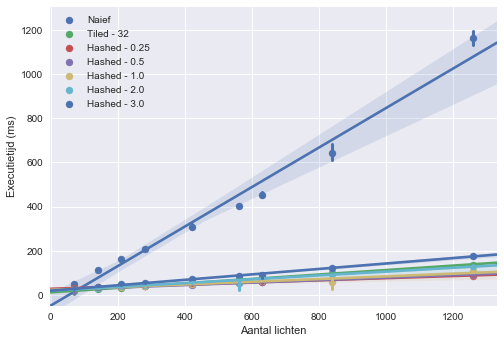

In [27]:
plot_lights_plot("spaceship-indoor", "forward")

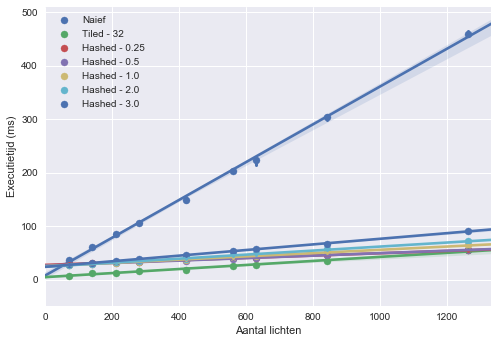

In [28]:
plot_lights_plot("spaceship-indoor", "deferred")

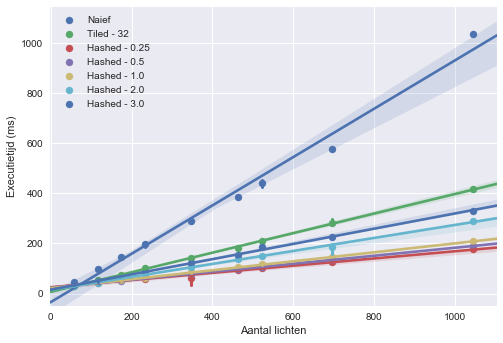

In [29]:
plot_lights_plot("pipers-alley", "forward")

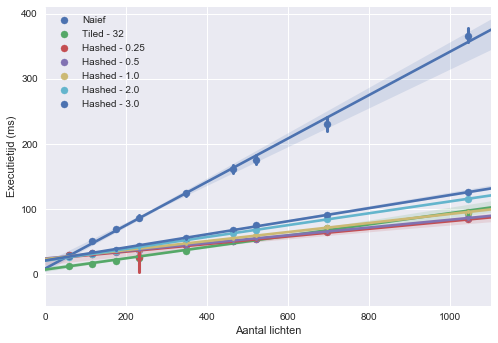

In [30]:
plot_lights_plot("pipers-alley", "deferred")

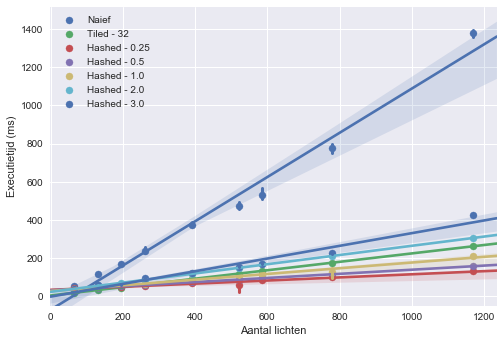

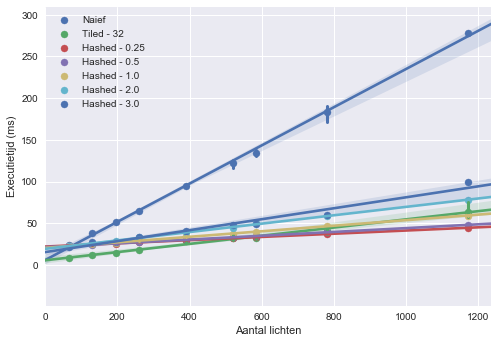

In [31]:
plot_lights_plot("ziggurat-city", "forward")
plot_lights_plot("ziggurat-city", "deferred")

In [32]:
def export_lights_plot(scene: str, pipeline_type: str):
    lights_attenuated = extract_lights_data_frame_attenuated(scene, pipeline_type)
    lights_tiled = extract_lights_data_frame_tiled(scene, pipeline_type)
    
    lights_hashed = list(extract_lights_data_frame_hashed(scene, i, pipeline_type) for i in range(5))

    # Plot resolution
    # -----------------------------------------------------------------------------------
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    sns.regplot("n_lights", "execution_time", 
                data=lights_attenuated, #fit_reg=False,
                ax=ax,
                label="Naief",
                x_estimator=np.mean,
                order=1,
                ci=100)
    sns.regplot("n_lights", "execution_time", 
                data=lights_tiled, #fit_reg=False,
                ax=ax,
                label="Tiled - 32",
                x_estimator=np.mean,
                order=1,
                ci=100)
    vals = [0.25, 0.5, 1.0, 2.0, 3.0]
    for x in range(5):
        sns.regplot("n_lights", "execution_time", 
                    data=lights_hashed[x], #fit_reg=False,
                    ax=ax,
                    label="Hashed - {}".format(vals[x]),
                    x_estimator=np.mean,
                    order=1,
                    ci=100)        
    
    ax.set(xlabel='Aantal lichten', ylabel='Executietijd (ms)')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    
    ax.set(ylim=(-49, None))
    # Export file
    # -------------------------------------------------------------
    path = ANALYSIS_ROOT / Path("graphs/lights/{}".format(pipeline_type))
    
    if not path.exists() or path.is_file():
        path.mkdir(parents=True)
        
    output_path = path / Path("lights_{}_{}.svg".format(scene, RESOLUTION))
    fig.savefig(str(output_path), bbox_inches='tight')
    plt.close(fig)

In [33]:
for pt in ["forward", "deferred"]:
    for scene in SCENES:
        export_lights_plot(scene, pt)